# Time Series Analysis of Wildfires in the US

## Abstract


[Recent studies](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020RG000726) on the climate change seems to suggest that increasing of frequency of heatwaves, all around the world, is correlated to increasing the frequency and intensity of wildfires.In summertime,droughts can improve the incidence of fires owing to dry vegetation. In the same way during winter, the decreasing of rains period and higher temperature can improve the incidence of fires. The analysis on the wildfire data in this notebook put in evidence if there is indeed an increase in wildfire incidence and/or intensity in the last years. Data of years before and after COVID-19 disease have been compared, to understand the side effects of restrictions (e.g. : lockdowns).



## Exploration Data Analysis

 In this section some explorating data analysis has been done. It has been done some plots to see the behaviour of the series : Acres Burned,Number of Fires and Acres Burned per Fire vs time(monthly). They have been aggregated by year, to find possible trends.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df_fire = pd.read_csv("/content/gdrive/MyDrive/data_final_assignment.csv")
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   271 non-null    int64  
 1   Acres Burned           271 non-null    int64  
 2   Number of Fires        271 non-null    int64  
 3   Acres Burned per Fire  271 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 8.6 KB


In [ ]:

df_fire.describe()

,Date,Acres Burned,Number of Fires,Acres Burned per Fire
count,271.000000,2.710000e+02,271.000000,271.000000
mean,201086.140221,5.913520e+05,5772.523985,97.572841
std,653.317411,7.333936e+05,3206.915653,110.145969
min,200001.000000,3.131000e+03,387.000000,5.200000
25%,200508.500000,1.061585e+05,3271.000000,21.655000
50%,201104.000000,2.768190e+05,5740.000000,52.800000
75%,201611.500000,8.186135e+05,7549.000000,138.935000
max,202207.000000,3.636606e+06,18469.000000,818.110000


In [ ]:
df_fire.head()

,Date,Acres Burned,Number of Fires,Acres Burned per Fire
0,200001,40757,2796,14.58
1,200002,168210,5671,29.66
2,200003,340899,10312,33.06
3,200004,182713,9236,19.78
4,200005,294493,11850,24.85


In [4]:
df_fire['Date'] =  pd.to_datetime(df_fire['Date'].astype(str), format='%Y%m')
df_fire.index = df_fire['Date']
df_fire = df_fire.asfreq("MS")
df_fire.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', length=271, freq='MS')

In [5]:
# creating dataframes for time univariate series : Acres Burned, Number of Fires and Acres Burned per Fire
df_fire_acres_burned = df_fire['Acres Burned']
df_fire_number = df_fire['Number of Fires']
df_fire_acres_burned_p_fire = df_fire['Acres Burned per Fire']


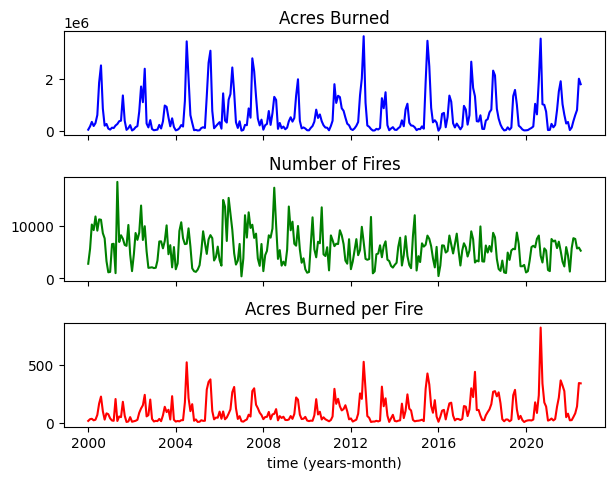

In [ ]:
# Raw data plot
figure, axis = plt.subplots(3, 1,sharex=True)
figure.tight_layout(pad=2)
axis[0].plot(df_fire_acres_burned.index, df_fire_acres_burned,"b")

axis[0].set_title("Acres Burned")


axis[1].plot(df_fire_number.index, df_fire_number,"g")

axis[1].set_title("Number of Fires")

axis[2].plot(df_fire_acres_burned_p_fire.index, df_fire_acres_burned_p_fire,"r")
axis[2].set_xlabel("time (years-month)")
axis[2].set_title("Acres Burned per Fire")

plt.show()



In [ ]:
# Annual resampling
df_fire_acres_burned_ = df_fire['Acres Burned'].groupby(df_fire['Acres Burned'].index.year).sum()
df_fire_number_ = df_fire['Number of Fires'].groupby(df_fire['Number of Fires'].index.year).sum()
df_fire_acres_burned_p_fire_ = df_fire['Acres Burned per Fire'].groupby(df_fire['Acres Burned per Fire'].index.year).sum()


In [ ]:
# df_fire_acres_burned_['Date'] =  pd.to_datetime(df_fire_acres_burned_.index,format = "%Y")
# df_fire_number_['Date'] =  pd.to_datetime(df_fire_number_.index,format = "%Y")
# df_fire_acres_burned_p_fire_['Date'] =  pd.to_datetime(df_fire_acres_burned_p_fire_.index,format = "%Y")

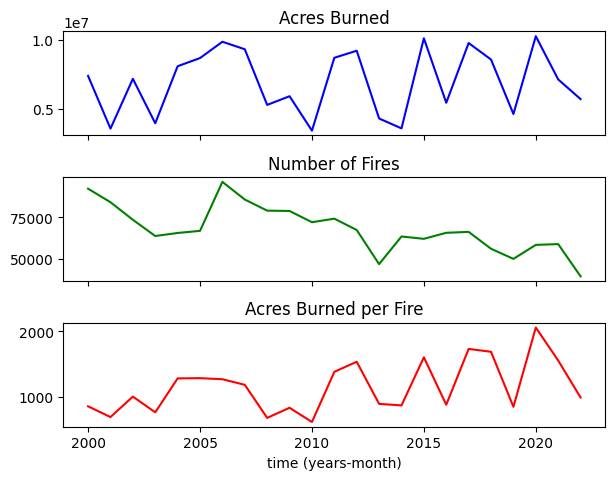

In [ ]:
figure, axis = plt.subplots(3, 1,sharex=True)
figure.tight_layout(pad=2)
axis[0].plot(df_fire_acres_burned_.index, df_fire_acres_burned_,"b")

axis[0].set_title("Acres Burned")


axis[1].plot(df_fire_number_.index, df_fire_number_,"g")

axis[1].set_title("Number of Fires")

axis[2].plot(df_fire_acres_burned_p_fire_.index, df_fire_acres_burned_p_fire_,"r")
axis[2].set_xlabel("time (years-month)")
axis[2].set_title("Acres Burned per Fire")

plt.show()


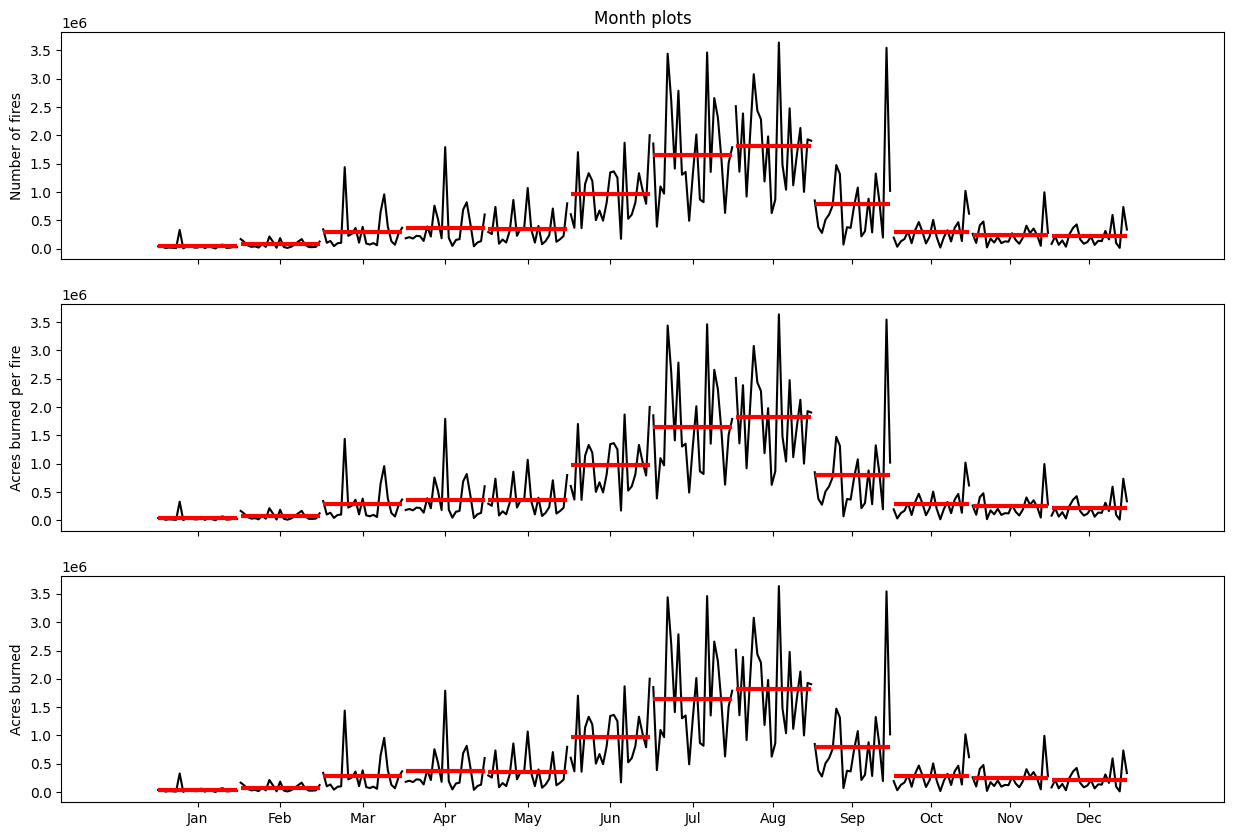

In [ ]:

# Month plots
fig, axes = plt.subplots(3, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].set_title("Month plots")
month_plot(df_fire_acres_burned, ax=axes[0], ylabel='Number of fires');
month_plot(df_fire_acres_burned, ax=axes[1], ylabel='Acres burned per fire');
month_plot(df_fire_acres_burned, ax=axes[2], ylabel='Acres burned');

plt.show()

# Decompositions

In order to extract the trend for the three features we need to perform a decomposition : seasonal,trend and residuals part.

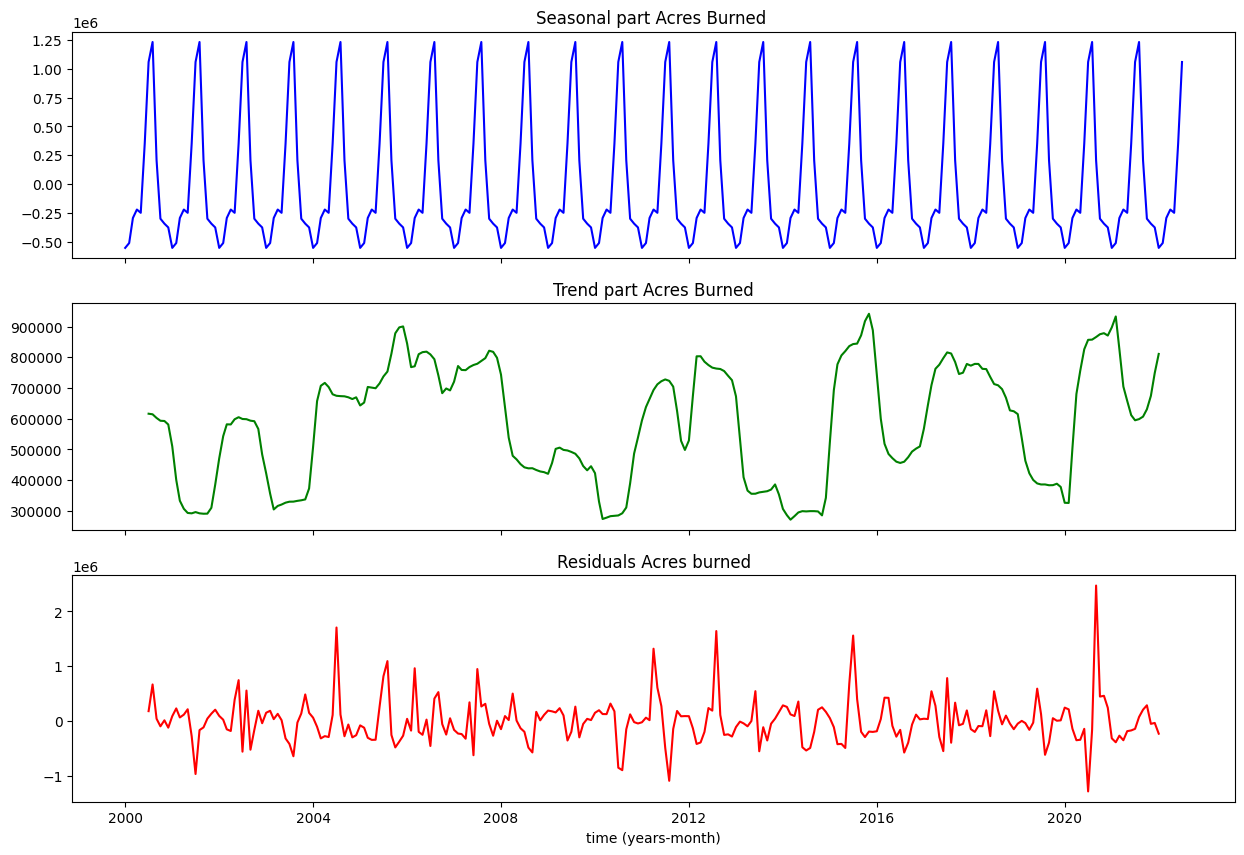

In [6]:
# Decomposition Acres Burned
figure, axis = plt.subplots(3, 1,sharex=True)

figure.set_figheight(10)
figure.set_figwidth(15)
axis[0].plot(df_fire_acres_burned.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").seasonal,"b")

axis[0].set_title("Seasonal part Acres Burned ")


axis[1].plot(df_fire_acres_burned.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").trend,"g")

axis[1].set_title("Trend part Acres Burned")

axis[2].plot(df_fire_acres_burned.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").resid,"r")
axis[2].set_xlabel("time (years-month)")
axis[2].set_title("Residuals Acres burned")

plt.show()

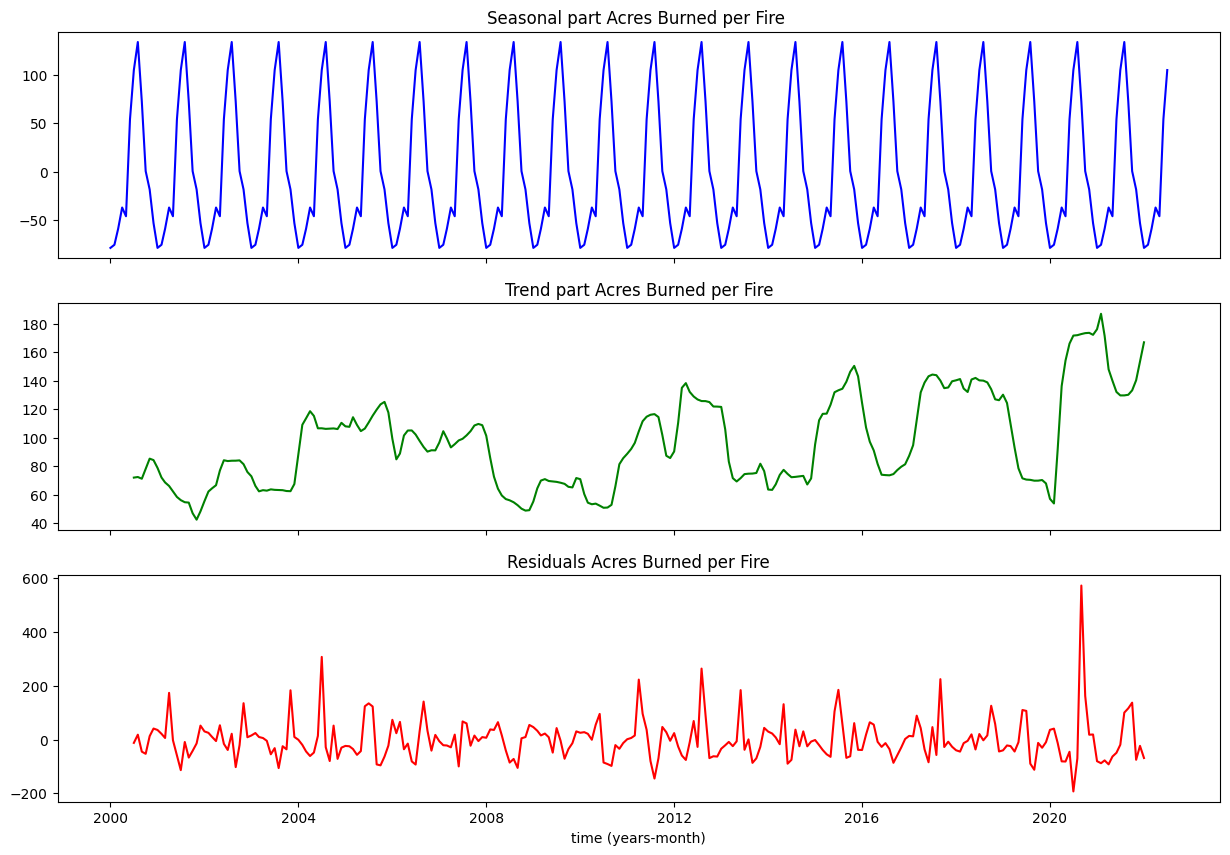

In [7]:
# Decomposition Acres Burned per Fire
figure, axis = plt.subplots(3, 1,sharex=True)

figure.set_figheight(10)
figure.set_figwidth(15)


axis[0].plot(df_fire_acres_burned_p_fire.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").seasonal,"b")

axis[0].set_title("Seasonal part Acres Burned per Fire ")


axis[1].plot(df_fire_acres_burned_p_fire.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").trend,"g")

axis[1].set_title("Trend part Acres Burned per Fire")

axis[2].plot(df_fire_acres_burned_p_fire.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").resid,"r")
axis[2].set_xlabel("time (years-month)")
axis[2].set_title("Residuals Acres Burned per Fire")

plt.show()

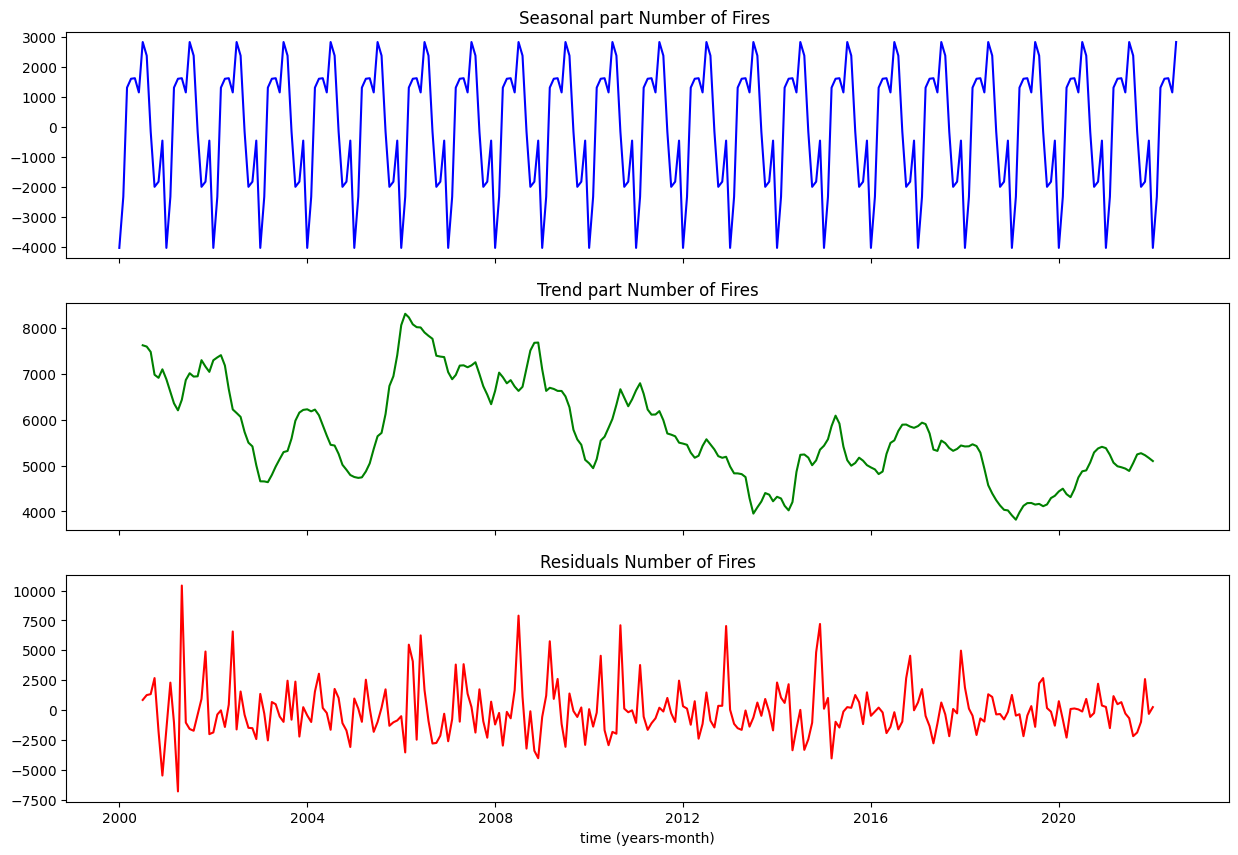

In [8]:
# Decomposition Number of Fires
figure, axis = plt.subplots(3, 1,sharex=True)

figure.set_figheight(10)
figure.set_figwidth(15)

axis[0].plot(df_fire_number.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").seasonal,"b")

axis[0].set_title("Seasonal part Number of Fires ")


axis[1].plot(df_fire_number.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").trend,"g")

axis[1].set_title("Trend part Number of Fires")

axis[2].plot(df_fire_number.index, statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").resid,"r")
axis[2].set_xlabel("time (years-month)")
axis[2].set_title("Residuals Number of Fires")

plt.show()

## Hypotesys Testing on stationarity

It has been done Augmented Dickey-Fuller test to find out the stationarity of the series, analyzing the residuals after the decomposition.

In [ ]:
residuals_fire_number = np.where(np.isnan(statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").resid.values), np.nanmean(statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").resid.values, axis=0), statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").resid.values)
adf_fires, pvalue_fires, usedlag_fires, nobs_fires, critical_values_fires, icbest_fires = adfuller(residuals_fire_number)
print("ADF = ", adf_fires)
print("p-value = ", pvalue_fires)

ADF =  -9.431942804771603
p-value =  5.161911821168585e-16


In [ ]:
residuals_acres_burned = np.where(np.isnan(statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").resid.values), np.nanmean(statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").resid.values, axis=0), statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").resid.values)

adf_fires, pvalue_fires, usedlag_fires, nobs_fires, critical_values_fires, icbest_fires = adfuller(residuals_acres_burned)
print("ADF = ", adf_fires)
print("p-value = ", pvalue_fires)

ADF =  -7.985693677570721
p-value =  2.5526442696696424e-12


In [ ]:
residuals_acres_burned_p_fire = np.where(np.isnan(statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").resid.values), np.nanmean(statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").resid.values, axis=0), statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").resid.values)
adf_fires, pvalue_fires, usedlag_fires, nobs_fires, critical_values_fires, icbest_fires = adfuller(residuals_acres_burned_p_fire)
print("ADF = ", adf_fires)
print("p-value = ", pvalue_fires)

ADF =  -7.687173753965033
p-value =  1.4512100436731026e-11


## Fits on trends

Find the parameters of fit for the series

In [9]:
# converting date YYYY/MM/DD in seconds
time_YY_MM_DD = df_fire_number.index.to_pydatetime()
timestamps_seconds = []
for time in time_YY_MM_DD:
    tstamp = time.timestamp() # number of seconds of the date YYYY/MM/DD in Unix epoch
    timestamps_seconds.append(tstamp)

# come back in year unit
x_axis = np.asarray(timestamps_seconds)
x_axis = x_axis - np.min(x_axis)
x_axis = x_axis / (np.pi*(10**7))
x_axis = x_axis + 2000

In [10]:
#y casual variables for models fitting
y_acres_burned = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned,model = "additive").trend.values
y_fire_number  = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number,model = "additive").trend.values
y_acres_burned_p_fire  = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire,model = "additive").trend.values

In [11]:
# filling NaN
y_acres_burned = np.where(np.isnan(y_acres_burned), np.nanmean(y_acres_burned, axis=0), y_acres_burned)
y_fire_number = np.where(np.isnan(y_fire_number), np.nanmean(y_fire_number, axis=0), y_fire_number)
y_acres_burned_p_fire = np.where(np.isnan(y_acres_burned_p_fire), np.nanmean(y_acres_burned_p_fire, axis=0), y_acres_burned_p_fire)

(array([4927.320231]), -9324756.533207314, 0.030990548620333125)

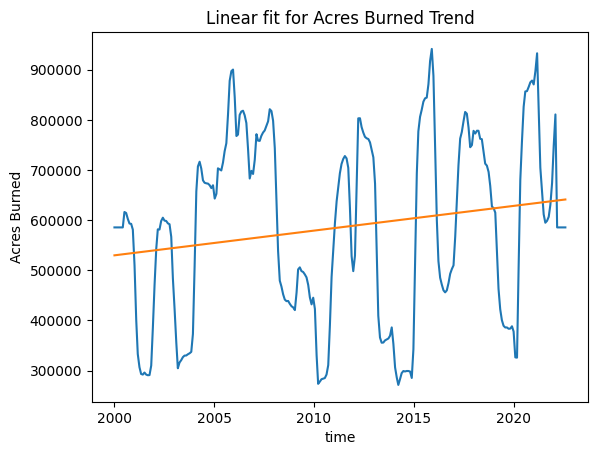

In [12]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis,(x_axis.shape[0],-1)),list(y_acres_burned))
y_pred_acres_burned = lr.predict(np.reshape(x_axis,(x_axis.shape[0],-1)))

plt.plot(x_axis,y_acres_burned)
plt.plot(x_axis,y_pred_acres_burned)
plt.title('Linear fit for Acres Burned Trend')
plt.xlabel('time')
plt.ylabel('Acres Burned')

lr.coef_,lr.intercept_,r2_score(y_acres_burned,y_pred_acres_burned)

(array([ 0.00000000e+00, -3.60244745e+05,  9.07801097e+01]),
 0.031351404739708544)

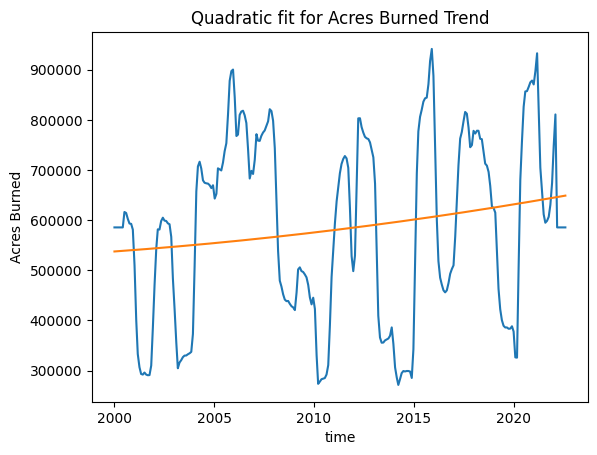

In [13]:
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(np.reshape(x_axis,(x_axis.shape[0],-1)))

lr_ = LinearRegression()
lr_.fit(poly_x,list(y_acres_burned))
y_pred_acres_burned = lr_.predict(poly_x)

plt.plot(x_axis,y_acres_burned)
plt.plot(x_axis,y_pred_acres_burned)
plt.title('Quadratic fit for Acres Burned Trend')
plt.xlabel('time')
plt.ylabel('Acres Burned')
lr_.coef_,r2_score(y_acres_burned,y_pred_acres_burned)

(array([-87.93817358]), 182594.27440026245, 0.3204070305616975)

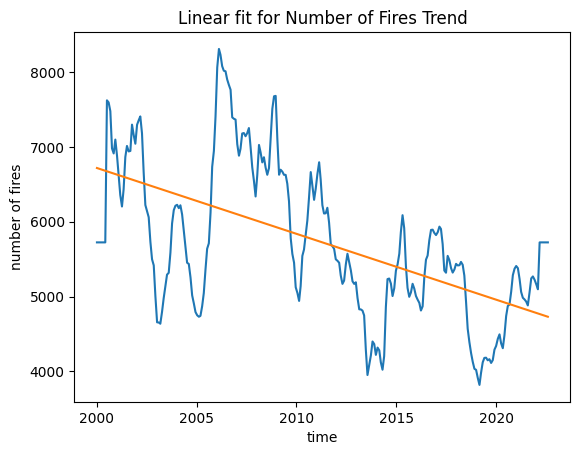

In [14]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis,(x_axis.shape[0],-1)),list(y_fire_number))
y_pred_fire_number = lr.predict(np.reshape(x_axis,(x_axis.shape[0],-1)))

plt.plot(x_axis,y_fire_number)
plt.plot(x_axis,y_pred_fire_number)
plt.title('Linear fit for Number of Fires Trend')
plt.xlabel('time')
plt.ylabel('number of fires')
lr.coef_,lr.intercept_,r2_score(y_fire_number,y_pred_fire_number)

(array([ 0.00000000e+00,  7.08061031e+03, -1.78206845e+00]), 0.324920815879586)

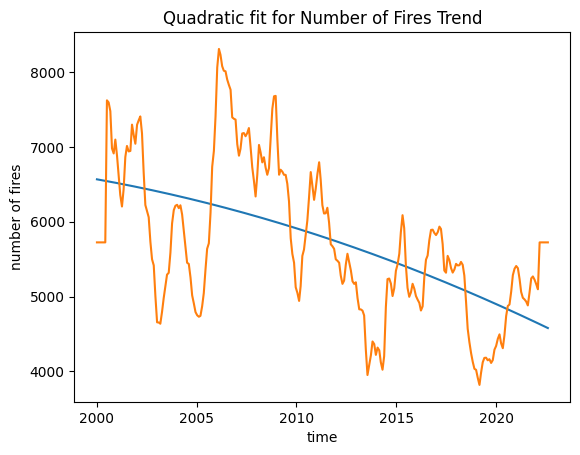

In [15]:
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(np.reshape(x_axis,(x_axis.shape[0],-1)))

lr_ = LinearRegression()
lr_.fit(poly_x,list(y_fire_number))
y_pred_fire_number = lr_.predict(poly_x)

plt.plot(x_axis,y_pred_fire_number)
plt.plot(x_axis,y_fire_number)
plt.title('Quadratic fit for Number of Fires Trend')
plt.xlabel('time')
plt.ylabel('number of fires')
lr_.coef_,r2_score(y_fire_number,y_pred_fire_number)

(array([2.37195842]), -4673.766092748693, 0.24399281897567704)

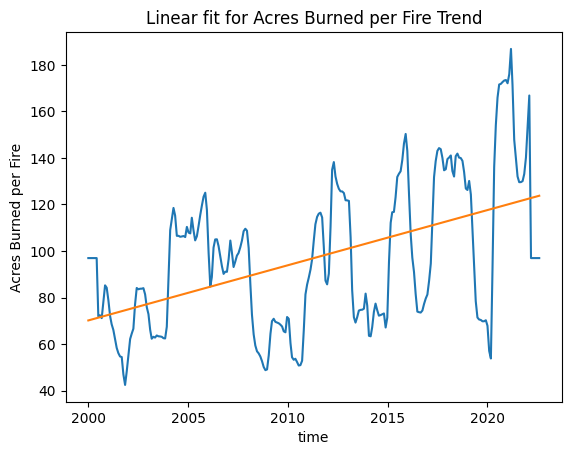

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis,(x_axis.shape[0],-1)),list(y_acres_burned_p_fire))
y_pred_acres_burned_p_fire = lr.predict(np.reshape(x_axis,(x_axis.shape[0],-1)))

plt.plot(x_axis,y_acres_burned_p_fire)
plt.plot(x_axis,y_pred_acres_burned_p_fire)
plt.title('Linear fit for Acres Burned per Fire Trend')
plt.xlabel('time')
plt.ylabel('Acres Burned per Fire')
lr.coef_,lr.intercept_,r2_score(y_acres_burned_p_fire,y_pred_acres_burned_p_fire)

(array([ 0.00000000e+00, -5.51234785e+02,  1.37624111e-01]),
 0.2721699605546942)

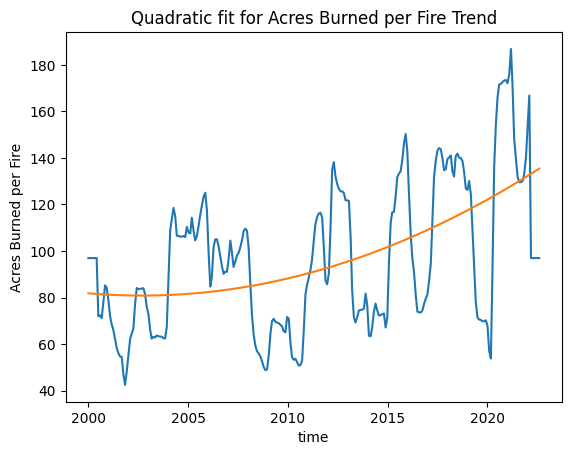

In [ ]:
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(np.reshape(x_axis,(x_axis.shape[0],-1)))

lr_ = LinearRegression()
lr_.fit(poly_x,list(y_acres_burned_p_fire))
y_pred_acres_burned_p_fire = lr_.predict(poly_x)

plt.plot(x_axis,y_acres_burned_p_fire)
plt.plot(x_axis,y_pred_acres_burned_p_fire)
plt.title('Quadratic fit for Acres Burned per Fire Trend')
plt.xlabel('time')
plt.ylabel('Acres Burned per Fire')
lr_.coef_,r2_score(y_acres_burned_p_fire,y_pred_acres_burned_p_fire)

# Covid-19 impact

To find if there is a possibile effects on restrictions due to covid-19, the trends on 2018-2019 and 2020-2021 are analyzed

In [ ]:
df_fire_acres_burned_18_19 = df_fire_acres_burned[(df_fire_acres_burned.index>='2018-01-01') & (df_fire_acres_burned.index<='2019-12-01')]
df_fire_acres_burned_20_21 = df_fire_acres_burned[(df_fire_acres_burned.index>='2020-01-01') & (df_fire_acres_burned.index<='2021-12-01')]

df_fire_acres_burned_p_fire_18_19 = df_fire_acres_burned_p_fire[(df_fire_acres_burned_p_fire.index>='2018-01-01') & (df_fire_acres_burned_p_fire.index<='2019-12-01')]
df_fire_acres_burned_p_fire_20_21 = df_fire_acres_burned_p_fire[(df_fire_acres_burned_p_fire.index>='2020-01-01') & (df_fire_acres_burned_p_fire.index<='2021-12-01')]

df_fire_number_18_19 = df_fire_number[(df_fire_number.index>='2018-01-01') & (df_fire_number.index<='2019-12-01')]
df_fire_number_20_21 = df_fire_number[(df_fire_number.index>='2020-01-01') & (df_fire_number.index<='2021-12-01')]


In [ ]:
x_axis_18_19 = np.array([el for el in x_axis if el >=2018 and el < 2020.09])
x_axis_20_21 = np.array([el for el in x_axis if el >=2020 and el < 2022])

In [ ]:
y_acres_burned_18_19 = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_18_19,model = "additive").trend.values
y_acres_burned_20_21 = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_20_21,model = "additive").trend.values

y_fire_number_18_19 = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number_18_19,model = "additive").trend.values
y_fire_number_20_21 = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_number_20_21,model = "additive").trend.values


y_acres_burned_p_fire_18_19 = statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire_18_19,model = "additive").trend.values
y_acres_burned_p_fire_20_21= statsmodels.tsa.seasonal.seasonal_decompose(df_fire_acres_burned_p_fire_20_21,model = "additive").trend.values

In [ ]:
y_acres_burned_18_19 = np.where(np.isnan(y_acres_burned_18_19), np.nanmean(y_acres_burned_18_19, axis=0), y_acres_burned_18_19)
y_acres_burned_20_21 = np.where(np.isnan(y_acres_burned_20_21), np.nanmean(y_acres_burned_20_21, axis=0), y_acres_burned_20_21)

y_fire_number_18_19 = np.where(np.isnan(y_fire_number_18_19), np.nanmean(y_fire_number_18_19, axis=0), y_fire_number_18_19)
y_fire_number_20_21 = np.where(np.isnan(y_fire_number_20_21), np.nanmean(y_fire_number_20_21, axis=0), y_fire_number_20_21)

y_acres_burned_p_fire_18_19 = np.where(np.isnan(y_acres_burned_p_fire_18_19), np.nanmean(y_acres_burned_p_fire_18_19, axis=0), y_acres_burned_p_fire_18_19)
y_acres_burned_p_fire_20_21 = np.where(np.isnan(y_acres_burned_p_fire_20_21), np.nanmean(y_acres_burned_p_fire_20_21, axis=0), y_acres_burned_p_fire_20_21)

(array([-44.6195563]), 94221.14608091455, 0.03418387148431268)

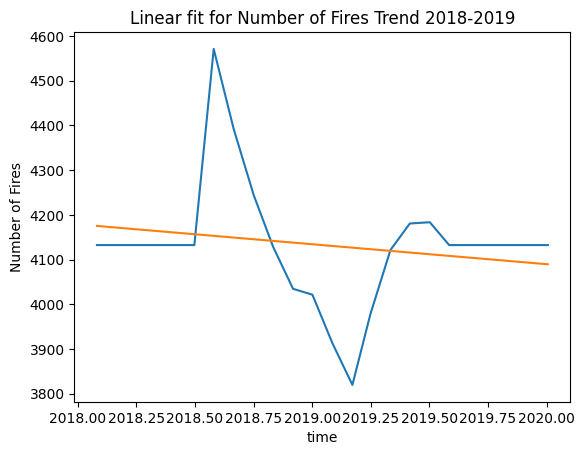

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis_18_19,(x_axis_18_19.shape[0],-1)),list(y_fire_number_18_19))
y_pred_fire_number_18_19 = lr.predict(np.reshape(x_axis_18_19,(x_axis_18_19.shape[0],-1)))

plt.plot(x_axis_18_19,y_fire_number_18_19)
plt.plot(x_axis_18_19,y_pred_fire_number_18_19)

plt.title('Linear fit for Number of Fires Trend 2018-2019')
plt.xlabel('time')
plt.ylabel('Number of Fires')

lr.coef_,lr.intercept_,r2_score(y_fire_number_18_19,y_pred_fire_number_18_19)

(array([-4.2200225]), 13650.05101930843, 0.000318935524504238)

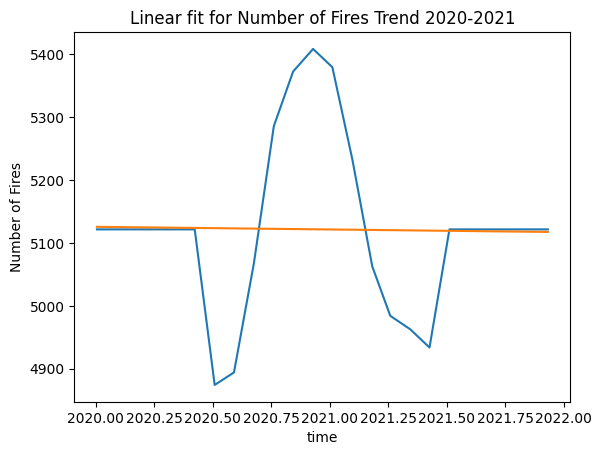

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)),list(y_fire_number_20_21))
y_pred_fire_number_20_21 = lr.predict(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)))

plt.plot(x_axis_20_21,y_fire_number_20_21)
plt.plot(x_axis_20_21,y_pred_fire_number_20_21)

plt.title('Linear fit for Number of Fires Trend 2020-2021')
plt.xlabel('time')
plt.ylabel('Number of Fires')

lr.coef_,lr.intercept_,r2_score(y_fire_number_20_21,y_pred_fire_number_20_21)

(array([ 0.00000000e+00,  6.82656940e+08, -3.37715561e+05,  5.56901436e+01]),
 0.026834248056923138)

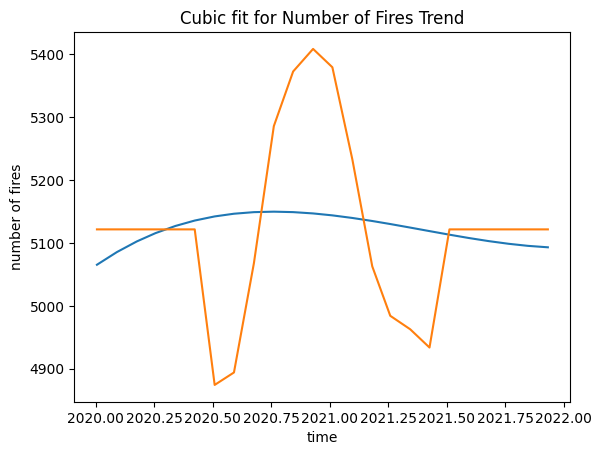

In [ ]:
poly = PolynomialFeatures(3)
poly_x = poly.fit_transform(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)))

lr_ = LinearRegression()
lr_.fit(poly_x,list(list(y_fire_number_20_21)))
y_pred_fire_number = lr_.predict(poly_x)

plt.plot(x_axis_20_21,y_pred_fire_number)
plt.plot(x_axis_20_21,y_fire_number_20_21)
plt.title('Cubic fit for Number of Fires Trend')
plt.xlabel('time')
plt.ylabel('number of fires')
lr_.coef_,r2_score(y_fire_number_20_21,y_pred_fire_number)

(array([-9.09990755]), 18490.81432489702, 0.10371349610957448)

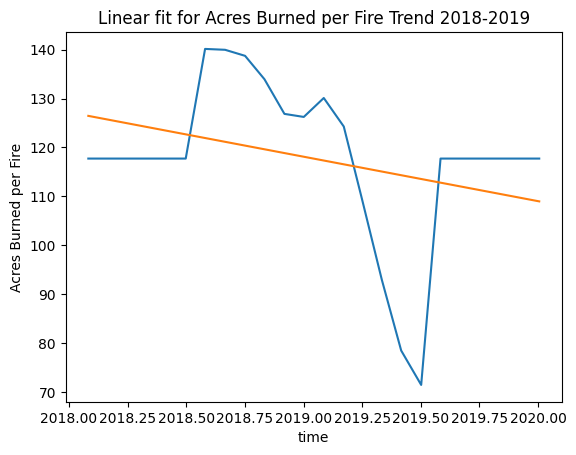

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis_18_19,(x_axis_18_19.shape[0],-1)),list(y_acres_burned_p_fire_18_19))
y_pred_acres_burned_p_fire_18_19 = lr.predict(np.reshape(x_axis_18_19,(x_axis_18_19.shape[0],-1)))

plt.plot(x_axis_18_19,y_acres_burned_p_fire_18_19)
plt.plot(x_axis_18_19,y_pred_acres_burned_p_fire_18_19)

plt.title('Linear fit for Acres Burned per Fire Trend 2018-2019')
plt.xlabel('time')
plt.ylabel('Acres Burned per Fire')
lr.coef_,lr.intercept_,r2_score(y_acres_burned_p_fire_18_19,y_pred_acres_burned_p_fire_18_19)

(array([-4.44321587]), 9145.353509972934, 0.05326198812667127)

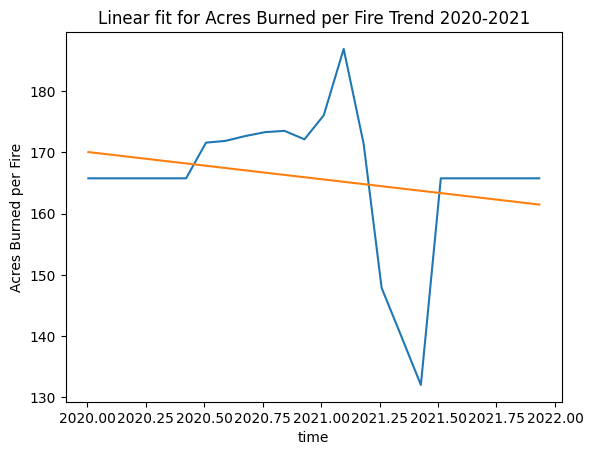

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)),list(y_acres_burned_p_fire_20_21))
y_pred_acres_burned_p_fire_20_21= lr.predict(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)))

plt.plot(x_axis_20_21,y_acres_burned_p_fire_20_21)
plt.plot(x_axis_20_21,y_pred_acres_burned_p_fire_20_21)

plt.title('Linear fit for Acres Burned per Fire Trend 2020-2021')
plt.xlabel('time')
plt.ylabel('Acres Burned per Fire')

lr.coef_,lr.intercept_,r2_score(y_acres_burned_p_fire_20_21,y_pred_acres_burned_p_fire_20_21)

(array([-49521.71379568]), 100558511.86060311, 0.11678602907407765)

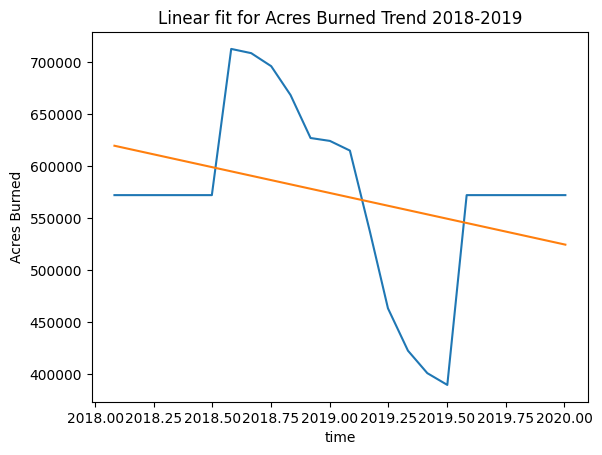

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis_18_19,(x_axis_18_19.shape[0],-1)),list(y_acres_burned_18_19))
y_pred_acres_burned_18_19 = lr.predict(np.reshape(x_axis_18_19,(x_axis_18_19.shape[0],-1)))

plt.plot(x_axis_18_19,y_acres_burned_18_19)
plt.plot(x_axis_18_19,y_pred_acres_burned_18_19)

plt.title('Linear fit for Acres Burned Trend 2018-2019')
plt.xlabel('time')
plt.ylabel('Acres Burned')

lr.coef_,lr.intercept_,r2_score(y_acres_burned_18_19,y_pred_acres_burned_18_19)

(array([-29253.79843811]), 59940542.821683355, 0.05969791607592956)

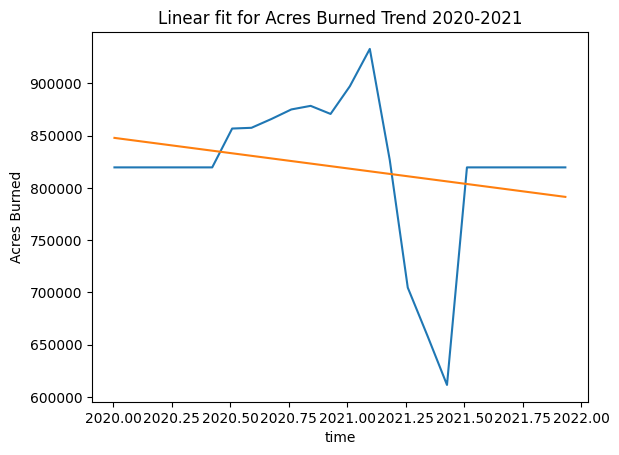

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)),list(y_acres_burned_20_21))
y_pred_acres_burned_20_21 = lr.predict(np.reshape(x_axis_20_21,(x_axis_20_21.shape[0],-1)))

plt.plot(x_axis_20_21,y_acres_burned_20_21)
plt.plot(x_axis_20_21,y_pred_acres_burned_20_21)

plt.title('Linear fit for Acres Burned Trend 2020-2021')
plt.xlabel('time')
plt.ylabel('Acres Burned')

lr.coef_,lr.intercept_,r2_score(y_acres_burned_20_21,y_pred_acres_burned_20_21)

## Forecasting : (S)Arima and LSTM

Description

## Conclusion and future developments

From the previous plot we see that we can safely fit the three trends linearly, the R^2 are similar and it's a good choice to prefer simplier model.
In the period of time analyzed (year 2000 to 2020), the number of fires decreases over time at a rate
-88 fires every year.
The fires spreading more, burning +2.37 acres per fire every year.
This behaviour leaded to an increasing of +4927 more acres burned every year.
The analysis shows that wildfires in the US became more dangerous over the last 20 years burning more and more acres of vegetation every year.
These linear, or quadratic, models are baseline: more complex model as autoregressive,integrated with moving average or recurrent neural network could be use in future development.
COVID PART
For the comparision beetween years 2018-2019 and 2020-2021 for all the six  series seems have a negative trends. In particular the trends are more negative in the period before Covid pandemic. The restrictions due to the disease didn't slower the spreading of fires all over the US than before.

In order to assert if the observed increase in wildfire destruction is caused by climate change (heatwaves and droughts in summertime) we should include historical meteorological and geospatial data with temperature and humidity at the time and place the wildfire developed (i.e.,the state where it is developed); they can be considered on for future developments.
